## DFO Nutrient Comparison

In [1]:
import sqlalchemy
from sqlalchemy import (create_engine, Column, String, Integer, Float, MetaData, 
                        Table, type_coerce, ForeignKey, case)
from sqlalchemy.orm import mapper, create_session, relationship, aliased, Session
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
from sqlalchemy.sql import and_, or_, not_, func
from sqlalchemy.sql import select
import os
from os.path import isfile
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import datetime as dt
import glob
import gsw

%matplotlib inline

In [2]:
PATH= '/results/SalishSea/hindcast.201905/'
start_date = dt.datetime(2014,1,1)
end_date = dt.datetime(2014,12,31)
flen=1
namfmt='nowcast'
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}
fdict={'ptrc_T':1,'grid_T':1}

df1=et.loadDFO(datelims=(start_date,end_date))#,excludeSaanich=False)
df1.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,2014.0,2.0,11.0,13.745278,48.299833,-123.9995,4.5,None,None,None,NaN,None,30.1,49.4,umol/L,32.134762,7.163426,4.46207,2014-02-11 13:44:43
1,2014.0,2.0,11.0,13.745278,48.299833,-123.9995,5.2,None,None,None,NaN,None,30.2,49.3,umol/L,32.203660,7.160991,5.15616,2014-02-11 13:44:43
2,2014.0,2.0,11.0,13.745278,48.299833,-123.9995,10.2,None,None,None,NaN,None,30.2,49.0,umol/L,32.260506,7.182615,10.1139,2014-02-11 13:44:43
3,2014.0,2.0,11.0,13.745278,48.299833,-123.9995,20.1,None,None,None,NaN,None,30.2,48.7,umol/L,32.333712,7.185608,19.9298,2014-02-11 13:44:43
4,2014.0,2.0,11.0,13.745278,48.299833,-123.9995,30.4,None,None,None,NaN,None,30.1,48.6,umol/L,32.340248,7.184490,30.1419,2014-02-11 13:44:43


(array([ 37.,   0., 488.,   0.,   0., 441.,   0.,  28., 303., 280.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

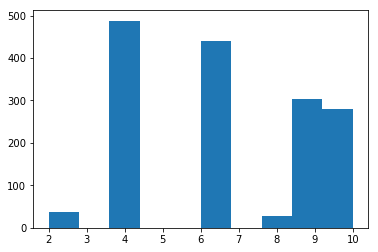

In [3]:
plt.hist(df1.Month)

In [4]:
data=et.matchData(df1,filemap, fdict, start_date, end_date, namfmt, PATH, flen)

In [5]:
data.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_ciliates,mod_flagellates,mod_vosaline,mod_votemper,k
0,2014.0,2.0,11.0,6.598056,48.618333,-123.248333,1.6,None,None,None,...,240,24.698824,47.131100,0.724844,0.018960,0.132510,0.265773,29.048010,6.792618,1
1,2014.0,2.0,11.0,6.598056,48.618333,-123.248333,1.6,None,None,None,...,240,24.698824,47.131100,0.724844,0.018960,0.132510,0.265773,29.048010,6.792618,1
2,2014.0,2.0,11.0,6.598056,48.618333,-123.248333,1.6,None,None,None,...,240,24.698824,47.131100,0.724844,0.018960,0.132510,0.265773,29.048010,6.792618,1
3,2014.0,2.0,11.0,6.598056,48.618333,-123.248333,1.6,None,None,None,...,240,24.698824,47.131100,0.724844,0.018960,0.132510,0.265773,29.048010,6.792618,1
4,2014.0,2.0,11.0,6.598056,48.618333,-123.248333,5.3,None,None,None,...,240,24.975159,46.963737,0.693262,0.016608,0.125883,0.250204,29.357609,6.867147,5


In [6]:
data.loc[data.Chlorophyll_Extracted>10]

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,...,i,mod_nitrate,mod_silicon,mod_ammonium,mod_diatoms,mod_ciliates,mod_flagellates,mod_vosaline,mod_votemper,k
161,2014.0,4.0,5.0,2.654444,49.030167,-123.436833,1.9,None,None,None,...,264,5.993624,17.285007,0.578803,7.410148,0.243753,0.646244,27.015253,9.200489,1
177,2014.0,4.0,5.0,7.424167,49.163000,-123.550000,1.8,None,None,None,...,264,1.016814,8.198307,0.245552,7.692879,0.255147,0.766962,26.375210,9.305083,1
179,2014.0,4.0,5.0,7.424167,49.163000,-123.550000,9.9,None,None,None,...,264,22.684628,45.377396,1.496674,0.790537,0.116655,0.127945,29.071020,8.104948,9
194,2014.0,4.0,5.0,11.425556,49.320167,-123.797833,1.7,None,None,None,...,247,1.484649,12.143503,0.439040,4.683687,0.220754,0.778615,24.309269,9.067633,1
196,2014.0,4.0,5.0,11.425556,49.320167,-123.797833,10.1,None,None,None,...,247,19.062761,39.729088,1.555899,1.954245,0.118538,0.177376,28.277945,8.283962,10
210,2014.0,4.0,5.0,15.458333,49.402000,-124.155167,2.5,None,None,None,...,205,6.041816,17.623251,0.955447,4.349483,0.202087,0.496643,26.771828,8.863210,2
212,2014.0,4.0,5.0,15.458333,49.402000,-124.155167,10.2,None,None,None,...,205,12.603150,29.645882,1.513235,2.660488,0.158752,0.296435,27.639456,8.674062,10
225,2014.0,4.0,5.0,19.200278,49.443167,-124.337167,1.6,None,None,None,...,183,10.900187,26.661680,1.332097,3.586850,0.178711,0.378933,27.401188,8.567981,1
227,2014.0,4.0,5.0,19.200278,49.443167,-124.337167,9.9,None,None,None,...,183,15.224560,34.586872,1.639777,2.261495,0.150470,0.248044,27.922915,8.404680,9
249,2014.0,4.0,6.0,0.872778,49.511000,-124.462333,2.0,None,None,None,...,173,14.105232,32.261967,1.473915,2.572832,0.158866,0.280691,27.864153,8.527529,1


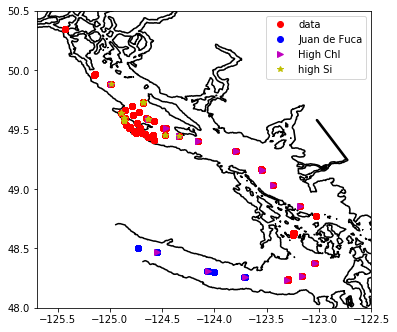

In [7]:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data['Lon'], data['Lat'], 'ro',label='data')
ax.plot(data.loc[(data.Lon < -123.5) & (data.Lat < 48.6),['Lon']], 
        data.loc[(data.Lon < -123.5) & (data.Lat < 48.6),['Lat']], 
        'bo', label = 'Juan de Fuca')
ax.plot(data.loc[data.Chlorophyll_Extracted>10,['Lon']],data.loc[data.Chlorophyll_Extracted>10,['Lat']],'m>',label='High Chl')

ax.plot(data.loc[data.Si>75,['Lon']],data.loc[data.Si>75,['Lat']],'*',color='y',label='high Si')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);

# Nitrate

In [8]:
N_s, modmean_s, obsmean_s, bias_s, RMSE_s, WSS_s = et.stats(data.loc[data.Z<15,['N']],data.loc[data.Z<15,['mod_nitrate']])
N_i, modmean_i, obsmean_i, bias_i, RMSE_i, WSS_i = et.stats(data.loc[(data.Z>=15)&(data.Z<22),['N']],data.loc[(data.Z>=15)&(data.Z<22),['mod_nitrate']])
N_d, modmean_d, obsmean_d, bias_d, RMSE_d, WSS_d = et.stats(data.loc[data.Z>=22,['N']],data.loc[data.Z>=22,['mod_nitrate']])
N, modmean, obsmean, bias, RMSE, WSS = et.stats(data.loc[:,['N']],data.loc[:,['mod_nitrate']])
print('Nitrate')
print('z<15 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_s,bias_s,RMSE_s,WSS_s))
print('15 m<=z<22 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_i,bias_i,RMSE_i,WSS_i))
print('z>=22 m:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N_d,bias_d,RMSE_d,WSS_d))
print('all:')
print('  N: {}\n  bias: {}\n  RMSE: {}\n  WSS: {}'.format(N,bias,RMSE,WSS))


Nitrate
z<15 m:
  N: 393
  bias: -2.7303211872791504
  RMSE: 6.10655629055643
  WSS: 0.8638795689346465
15 m<=z<22 m:
  N: 90
  bias: -2.3574949723349654
  RMSE: 4.275083897857443
  WSS: 0.8348832739493005
z>=22 m:
  N: 1018
  bias: -2.9391002971859024
  RMSE: 3.659748932501788
  WSS: 0.812405632803054
all:
  N: 1501
  bias: -2.849563542069351
  RMSE: 4.465777968087917
  WSS: 0.9208235698525946


(0, 40)

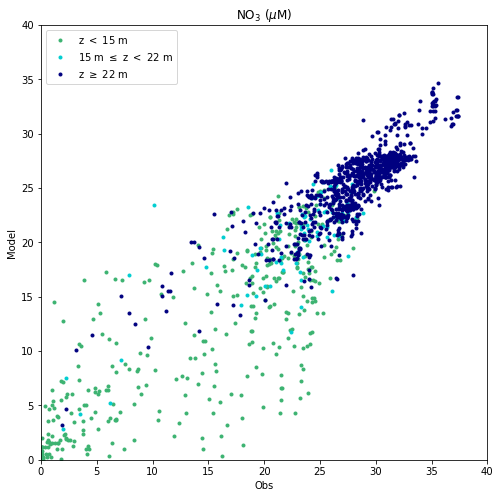

In [9]:
fig, ax = plt.subplots(figsize = (8,8))
ps=et.varvarPlot(ax,data,'N','mod_nitrate','Z',(15,22),'z','m',('mediumseagreen','darkturquoise','navy'))
ax.legend(handles=ps)
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('NO$_3$ ($\mu$M)')
ax.set_xlim(0,40)
ax.set_ylim(0,40)

Nitrate, z<15
Feb-Mar:
  N: 6
  bias: -4.482649993896484
  RMSE: 4.502947500211073
  WSS: 0.06385726672417513
April:
  N: 136
  bias: -5.877431091929186
  RMSE: 8.519874232541977
  WSS: 0.6944495451060946
May-Jun:
  N: 123
  bias: -1.307578994743226
  RMSE: 5.193401373880159
  WSS: 0.8708794345501505
Sep-Oct:
  N: 128
  bias: -0.6715428264183014
  RMSE: 3.240171593060894
  WSS: 0.9590081188979631


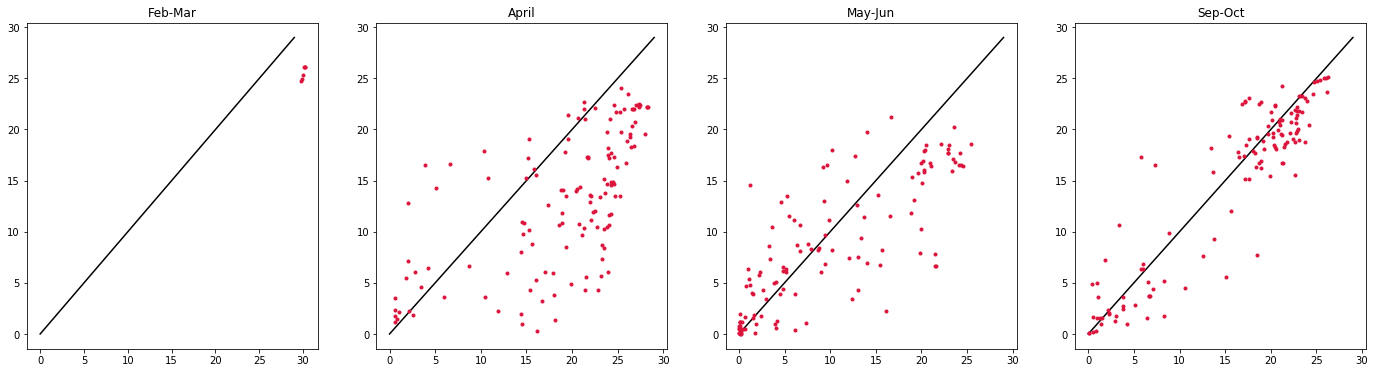

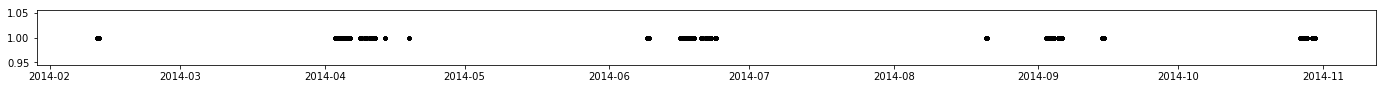

In [10]:
fig, ax = plt.subplots(1,4,figsize = (24,6))
yy=data.dtUTC[0].year
for axi in ax:
    axi.plot(np.arange(0,30),np.arange(0,30),'k-')
ps=et.varvarPlot(ax[0],data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[0].set_title('Feb-Mar')
ii1=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,5,1))&(data.dtUTC>dt.datetime(yy,4,1))
ps=et.varvarPlot(ax[1],data.loc[ii1,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[1].set_title('April')
ii2=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,9,1))&(data.dtUTC>dt.datetime(yy,5,1))
ps=et.varvarPlot(ax[2],data.loc[ii2,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[2].set_title('May-Jun')
ii3=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,12,1))&(data.dtUTC>dt.datetime(yy,9,1))
ps=et.varvarPlot(ax[3],data.loc[ii3,:],'N','mod_nitrate',cols=('crimson','darkturquoise','navy'))
ax[3].set_title('Sep-Oct')

#ii4=(data.Z < 15)&(data.dtUTC<=dt.datetime(2016,4,1))&(data.dtUTC>dt.datetime(2016,2,1))
#ps=et.varvarPlot(ax[0],data.loc[ii4,:],obsvar,modvar,cols=('darkturquoise','navy'))
#ii5=(data.Z < 15)&(data.dtUTC<=dt.datetime(2016,5,1))&(data.dtUTC>dt.datetime(2016,4,1))
#ps=et.varvarPlot(ax[1],data.loc[ii5,:],obsvar,modvar,cols=('darkturquoise','navy'))

print('Nitrate, z<15')
print('Feb-Mar:')
et.printstats(data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],'N','mod_nitrate')
print('April:')
et.printstats(data.loc[ii1,:],'N','mod_nitrate')
print('May-Jun:')
et.printstats(data.loc[ii2,:],'N','mod_nitrate')
print('Sep-Oct:')
et.printstats(data.loc[ii3,:],'N','mod_nitrate')
fig,ax=plt.subplots(1,1,figsize=(24,1))
plt.plot(data.dtUTC,np.ones(np.shape(data.dtUTC)),'k.')

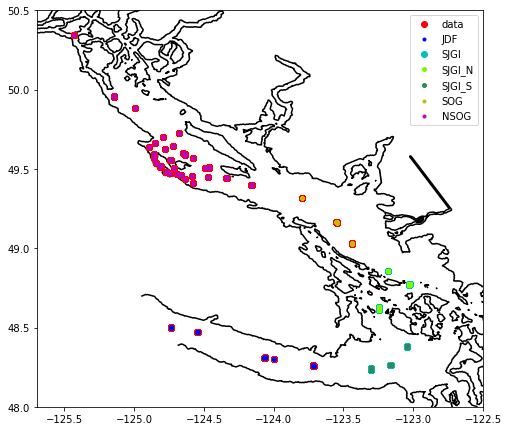

In [11]:
fig, ax = plt.subplots(figsize = (8,8))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data['Lon'], data['Lat'], 'ro',label='data')
dJDF=data.loc[(data.Lon<-123.6)&(data.Lat<48.6)]
ax.plot(dJDF['Lon'],dJDF['Lat'],'b.',label='JDF')
dSJGI=data.loc[(data.Lon>=-123.6)&(data.Lat<48.9)]
ax.plot(dSJGI['Lon'],dSJGI['Lat'],'c.',label='SJGI',ms=12)
dSJGI_N=data.loc[(data.Lon>=-123.6)&(data.Lat<48.9)&(data.Lat>48.5)]
ax.plot(dSJGI_N['Lon'],dSJGI_N['Lat'],'.',color='lawngreen',label='SJGI_N',ms=8)
dSJGI_S=data.loc[(data.Lon>=-123.6)&(data.Lat<48.5)]
ax.plot(dSJGI_S['Lon'],dSJGI_S['Lat'],'.',color='seagreen',label='SJGI_S',ms=8)
dSOG=data.loc[(data.Lat>=48.9)&(data.Lon>-124.0)]
ax.plot(dSOG['Lon'],dSOG['Lat'],'y.',label='SOG')
dNSOG=data.loc[(data.Lat>=48.9)&(data.Lon<=-124.0)]
ax.plot(dNSOG['Lon'],dNSOG['Lat'],'m.',label='NSOG')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);

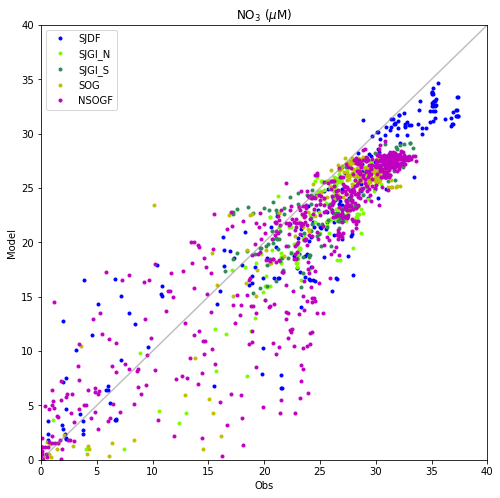

In [12]:
fig, ax = plt.subplots(figsize = (8,8))
ps1=et.varvarPlot(ax,dJDF,'N','mod_nitrate',cols=('b','darkturquoise','navy'),lname='SJDF')
ps2=et.varvarPlot(ax,dSJGI_N,'N','mod_nitrate',cols=('lawngreen','darkturquoise','navy'),lname='SJGI_N')
ps3=et.varvarPlot(ax,dSJGI_S,'N','mod_nitrate',cols=('seagreen','darkturquoise','navy'),lname='SJGI_S')
ps4=et.varvarPlot(ax,dSOG,'N','mod_nitrate',cols=('y','darkturquoise','navy'),lname='SOG')
ps5=et.varvarPlot(ax,dNSOG,'N','mod_nitrate',cols=('m','darkturquoise','navy'),lname='NSOGF')
ax.legend(handles=[ps1[0][0],ps2[0][0],ps3[0][0],ps4[0][0],ps5[0][0]])
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('NO$_3$ ($\mu$M)')
ax.set_xlim(0,40)
ax.set_ylim(0,40)
ax.plot((0,40),(0,40),'-',color='grey',alpha=.5)

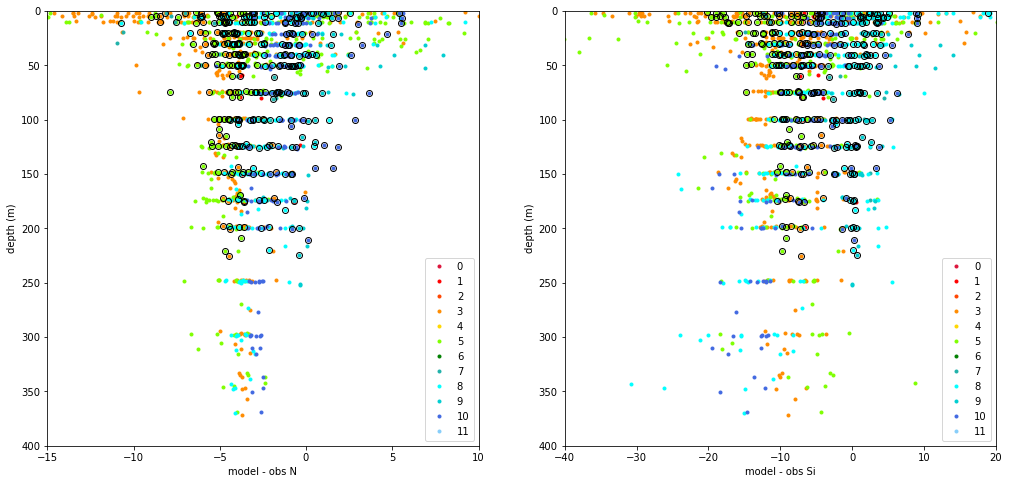

In [13]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_nitrate']].values-data.loc[iii,['N']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_silicon']].values-data.loc[iii,['Si']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model - obs N')
ax[0].set_xlim(-15,10)
ax[1].set_xlabel('model - obs Si')
ax[1].set_xlim(-40,20)
ax[0].plot(dSJGI['mod_nitrate']-dSJGI['N'],dSJGI['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dSJGI['mod_silicon']-dSJGI['Si'],dSJGI['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

# Silicate

In [14]:
print('Si')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'Si','mod_silicon')
print('15 m<=z<22 m:')
et.printstats(data.loc[(data.Z>=15)&(data.Z<22),:],'Si','mod_silicon')
print('z>=22 m:')
et.printstats(data.loc[data.Z>=22,:],'Si','mod_silicon')
print('all:')
et.printstats(data,'Si','mod_silicon')
print('obs Si < 50:')
et.printstats(data.loc[data.Si<50,:],'Si','mod_silicon')

Si
z<15 m:
  N: 393
  bias: -5.313965230970894
  RMSE: 12.225923195457375
  WSS: 0.7132987135673746
15 m<=z<22 m:
  N: 90
  bias: -5.220086020151776
  RMSE: 8.985807212605636
  WSS: 0.7738192629776113
z>=22 m:
  N: 1018
  bias: -7.573503380796062
  RMSE: 10.135948571205649
  WSS: 0.7250617487592126
all:
  N: 1501
  bias: -6.840787820943113
  RMSE: 10.660927565762762
  WSS: 0.8092900287805662
obs Si < 50:
  N: 866
  bias: -4.192679908798695
  RMSE: 9.520230211369558
  WSS: 0.7733397540408118


(0, 80)

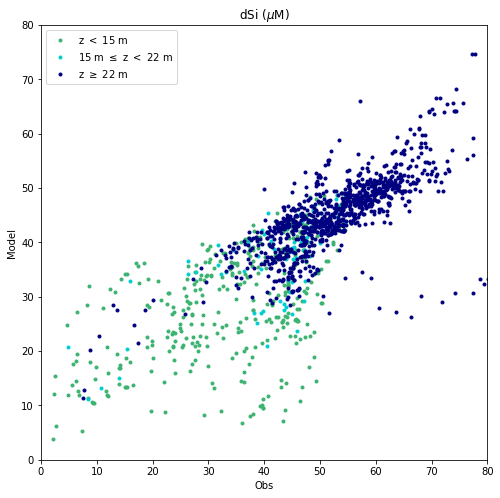

In [15]:
fig, ax = plt.subplots(figsize = (8,8))
ps=et.varvarPlot(ax,data,'Si','mod_silicon','Z',(15,22),'z','m',('mediumseagreen','darkturquoise','navy'))
ax.legend(handles=ps)
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('dSi ($\mu$M)')
ax.set_xlim(0,80)
ax.set_ylim(0,80)

Silicate, z<15
Feb-Mar:
  N: 6
  bias: -6.046316528320304
  RMSE: 6.101117757395011
  WSS: 0.47542843013516534
April:
  N: 136
  bias: -9.60165979055797
  RMSE: 15.487544361445977
  WSS: 0.6555272369439746
May-Jun:
  N: 123
  bias: -7.643492434121725
  RMSE: 12.856949126089397
  WSS: 0.5638021173836862
Sep-Oct:
  N: 128
  bias: 1.514569252431393
  RMSE: 6.594313678390639
  WSS: 0.8950114982434323


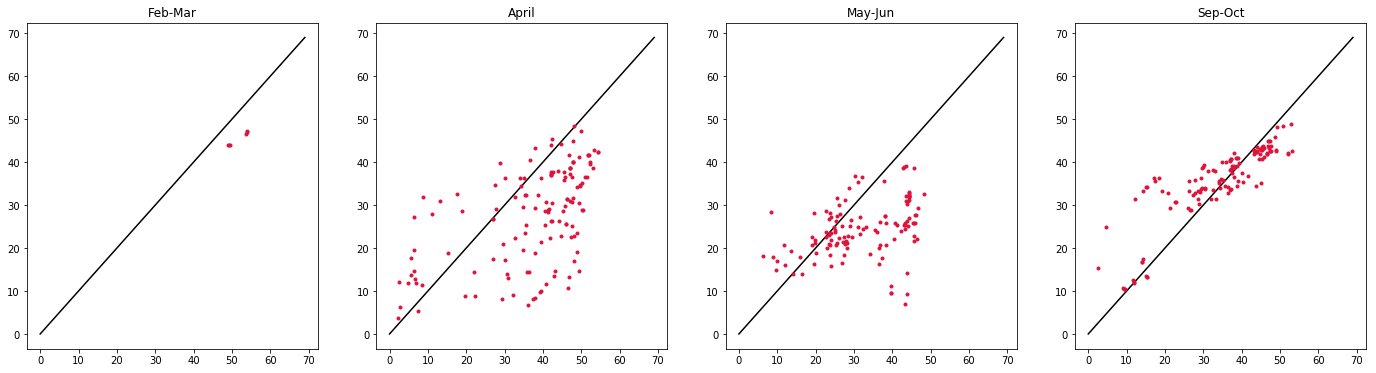

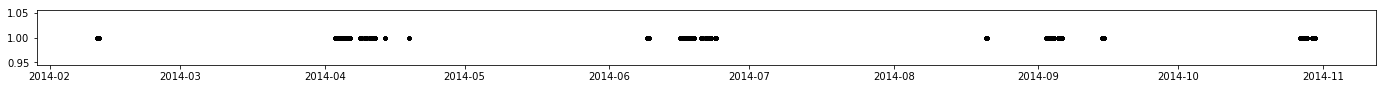

In [16]:
obsvar='Si'; modvar='mod_silicon'
fig, ax = plt.subplots(1,4,figsize = (24,6))
for axi in ax:
    axi.plot(np.arange(0,70),np.arange(0,70),'k-')
ps=et.varvarPlot(ax[0],data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[0].set_title('Feb-Mar')
ii1=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,5,1))&(data.dtUTC>dt.datetime(yy,4,1))
ps=et.varvarPlot(ax[1],data.loc[ii1,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[1].set_title('April')
ii2=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,9,1))&(data.dtUTC>dt.datetime(yy,5,1))
ps=et.varvarPlot(ax[2],data.loc[ii2,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[2].set_title('May-Jun')
ii3=(data.Z < 15)&(data.dtUTC<=dt.datetime(yy,12,1))&(data.dtUTC>dt.datetime(yy,9,1))
ps=et.varvarPlot(ax[3],data.loc[ii3,:],obsvar,modvar,cols=('crimson','darkturquoise','navy'))
ax[3].set_title('Sep-Oct')

print('Silicate, z<15')
print('Feb-Mar:')
et.printstats(data.loc[(data.Z<15)&(data.dtUTC<=dt.datetime(yy,4,1)),:],obsvar,modvar)
print('April:')
et.printstats(data.loc[ii1,:],obsvar,modvar)
print('May-Jun:')
et.printstats(data.loc[ii2,:],obsvar,modvar)
print('Sep-Oct:')
et.printstats(data.loc[ii3,:],obsvar,modvar)
fig,ax=plt.subplots(1,1,figsize=(24,1))
plt.plot(data.dtUTC,np.ones(np.shape(data.dtUTC)),'k.')

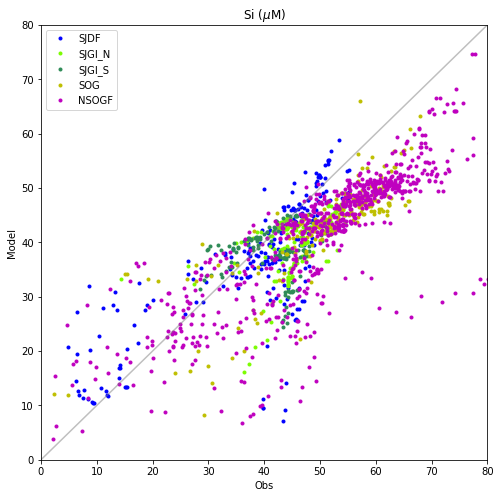

In [17]:
fig, ax = plt.subplots(figsize = (8,8))
ps1=et.varvarPlot(ax,dJDF,obsvar,modvar,cols=('b','darkturquoise','navy'),lname='SJDF')
ps2=et.varvarPlot(ax,dSJGI_N,obsvar,modvar,cols=('lawngreen','darkturquoise','navy'),lname='SJGI_N')
ps3=et.varvarPlot(ax,dSJGI_S,obsvar,modvar,cols=('seagreen','darkturquoise','navy'),lname='SJGI_S')
ps4=et.varvarPlot(ax,dSOG,obsvar,modvar,cols=('y','darkturquoise','navy'),lname='SOG')
ps5=et.varvarPlot(ax,dNSOG,obsvar,modvar,cols=('m','darkturquoise','navy'),lname='NSOGF')
ax.legend(handles=[ps1[0][0],ps2[0][0],ps3[0][0],ps4[0][0],ps5[0][0]])
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('Si ($\mu$M)')
ax.set_xlim(0,80)
ax.set_ylim(0,80)
ax.plot((0,80),(0,80),'-',color='grey',alpha=.5)

# Ratios

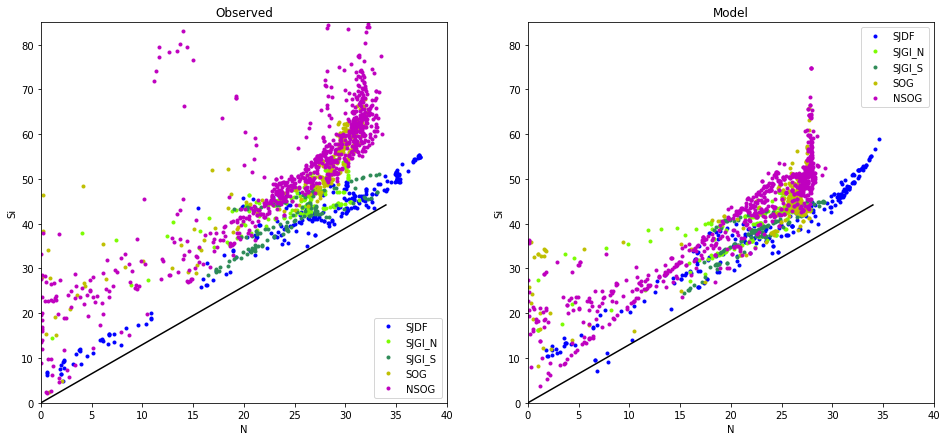

In [18]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
p1=ax[0].plot(dJDF['N'],dJDF['Si'],'b.',label='SJDF')
p2=ax[0].plot(dSJGI_N['N'],dSJGI_N['Si'],'.',color='lawngreen',label='SJGI_N')
p2=ax[0].plot(dSJGI_S['N'],dSJGI_S['Si'],'.',color='seagreen',label='SJGI_S')
p3=ax[0].plot(dSOG['N'],dSOG['Si'],'y.',label='SOG')
p4=ax[0].plot(dNSOG['N'],dNSOG['Si'],'m.',label='NSOG')
ax[0].set_title('Observed')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Si')
ax[0].set_xlim(0,40)
ax[0].set_ylim(0,85)
ax[0].legend()

p5=ax[1].plot(dJDF['mod_nitrate'],dJDF['mod_silicon'],'b.',label='SJDF')
p6=ax[1].plot(dSJGI_N['mod_nitrate'],dSJGI_N['mod_silicon'],'.',color='lawngreen',label='SJGI_N')
p6=ax[1].plot(dSJGI_S['mod_nitrate'],dSJGI_S['mod_silicon'],'.',color='seagreen',label='SJGI_S')
p7=ax[1].plot(dSOG['mod_nitrate'],dSOG['mod_silicon'],'y.',label='SOG')
p8=ax[1].plot(dNSOG['mod_nitrate'],dNSOG['mod_silicon'],'m.',label='NSOG')
ax[1].set_title('Model')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Si')
ax[1].set_xlim(0,40)
ax[1].set_ylim(0,85)
ax[1].legend()
ax[0].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')
ax[1].plot(np.arange(0,35),1.3*np.arange(0,35),'k-')

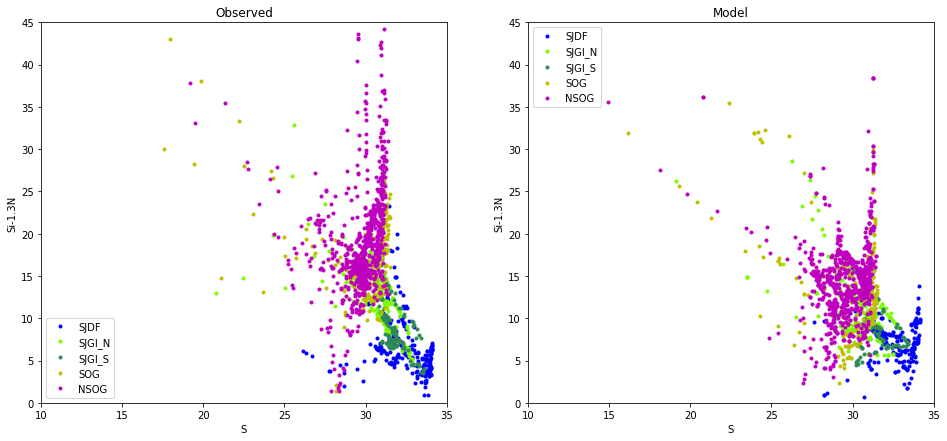

In [19]:
fig,ax=plt.subplots(1,2,figsize=(16,7))
p1=ax[0].plot(dJDF['AbsSal'], dJDF['Si']-1.3*dJDF['N'],'b.',label='SJDF')
p2=ax[0].plot(dSJGI_N['AbsSal'],dSJGI_N['Si']-1.3*dSJGI_N['N'],'.',color='lawngreen',label='SJGI_N')
p2=ax[0].plot(dSJGI_S['AbsSal'],dSJGI_S['Si']-1.3*dSJGI_S['N'],'.',color='seagreen',label='SJGI_S')
p3=ax[0].plot(dSOG['AbsSal'],dSOG['Si']-1.3*dSOG['N'],'y.',label='SOG')
p4=ax[0].plot(dNSOG['AbsSal'],dNSOG['Si']-1.3*dNSOG['N'],'m.',label='NSOG')
ax[0].set_title('Observed')
ax[0].set_xlabel('S')
ax[0].set_ylabel('Si-1.3N')
ax[0].set_xlim(10,35)
ax[0].set_ylim(0,45)
ax[0].legend()

p5=ax[1].plot(dJDF['mod_vosaline'],dJDF['mod_silicon']-1.3*dJDF['mod_nitrate'],'b.',label='SJDF')
p6=ax[1].plot(dSJGI_N['mod_vosaline'],dSJGI_N['mod_silicon']-1.3*dSJGI_N['mod_nitrate'],'.',color='lawngreen',label='SJGI_N')
p6=ax[1].plot(dSJGI_S['mod_vosaline'],dSJGI_S['mod_silicon']-1.3*dSJGI_S['mod_nitrate'],'.',color='seagreen',label='SJGI_S')
p7=ax[1].plot(dSOG['mod_vosaline'],dSOG['mod_silicon']-1.3*dSOG['mod_nitrate'],'y.',label='SOG')
p8=ax[1].plot(dNSOG['mod_vosaline'],dNSOG['mod_silicon']-1.3*dNSOG['mod_nitrate'],'m.',label='NSOG')
ax[1].set_title('Model')
ax[1].set_xlabel('S')
ax[1].set_ylabel('Si-1.3N')
ax[1].set_xlim(10,35)
ax[1].set_ylim(0,45)
ax[1].legend()

In [20]:
data.loc[data.Si>65,['Month','Lat','Lon','Z','Si']]

,Month,Lat,Lon,Z,Si
193,4.0,49.163000,-123.550000,371.972,66.40
239,4.0,49.443167,-124.337167,297.327,68.20
240,4.0,49.443167,-124.337167,314.454,68.90
272,4.0,49.592167,-124.637167,148.369,68.00
273,4.0,49.592167,-124.637167,162.734,67.10
290,4.0,49.726833,-124.680833,347.606,68.80
369,4.0,49.518000,-124.811667,45.5035,74.90
370,4.0,49.518000,-124.811667,47.1886,74.30
375,4.0,49.536167,-124.841833,37.8707,68.60
376,4.0,49.536167,-124.841833,39.8532,68.20


# Chlorophyll

In [21]:
data['l10_obsChl']=np.log10(data['Chlorophyll_Extracted']+0.01)
data['l10_modChl']=np.log10(2*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])+0.01)
data['mod_Chl']=2*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])

In [22]:
print('log10[Chl+0.01]')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'l10_obsChl','l10_modChl')
print('z>=15 m:')
et.printstats(data.loc[data.Z>=15,:],'l10_obsChl','l10_modChl')
print('all:')
et.printstats(data,'l10_obsChl','l10_modChl')
print('\n')
print('Chl')
print('z<15 m:')
et.printstats(data.loc[data.Z<15,:],'Chlorophyll_Extracted','mod_Chl')
print('z>=15 m:')
et.printstats(data.loc[data.Z>=15,:],'Chlorophyll_Extracted','mod_Chl')
print('all:')
et.printstats(data,'Chlorophyll_Extracted','mod_Chl')


log10[Chl+0.01]
z<15 m:
  N: 175
  bias: -0.17333231891775794
  RMSE: 0.4884716740631642
  WSS: 0.7725155230191022
z>=15 m:
  N: 86
  bias: -0.22044759620737486
  RMSE: 0.4813212284260679
  WSS: 0.6395948268027105
all:
  N: 261
  bias: -0.18885689304383851
  RMSE: 0.48612720694484135
  WSS: 0.7644326096222483


Chl
z<15 m:
  N: 175
  bias: -1.8476581436116404
  RMSE: 5.788277181006277
  WSS: 0.6123883468947814
z>=15 m:
  N: 86
  bias: -0.9002690311488315
  RMSE: 1.9968440459449122
  WSS: 0.5698034007658352
all:
  N: 261
  bias: -1.5354916161334744
  RMSE: 4.876302040522985
  WSS: 0.634526110040528


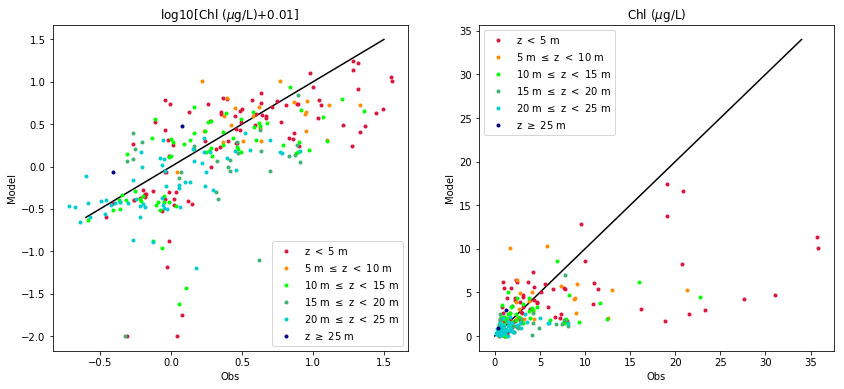

In [23]:
fig, ax = plt.subplots(1,2,figsize = (14,6))
ax[0].plot(np.arange(-.6,1.6,.1),np.arange(-.6,1.6,.1),'k-')
ps=et.varvarPlot(ax[0],data,'l10_obsChl','l10_modChl','Z',(5,10,15,20,25),'z','m',('crimson','darkorange','lime','mediumseagreen','darkturquoise','navy'))
ax[0].legend(handles=ps)
ax[0].set_xlabel('Obs')
ax[0].set_ylabel('Model')
ax[0].set_title('log10[Chl ($\mu$g/L)+0.01]')
ax[1].plot(np.arange(0,35),np.arange(0,35),'k-')
ps=et.varvarPlot(ax[1],data,'Chlorophyll_Extracted','mod_Chl','Z',(5,10,15,20,25),'z','m',('crimson','darkorange','lime','mediumseagreen','darkturquoise','navy'))
ax[1].legend(handles=ps)
ax[1].set_xlabel('Obs')
ax[1].set_ylabel('Model')
ax[1].set_title('Chl ($\mu$g/L)')

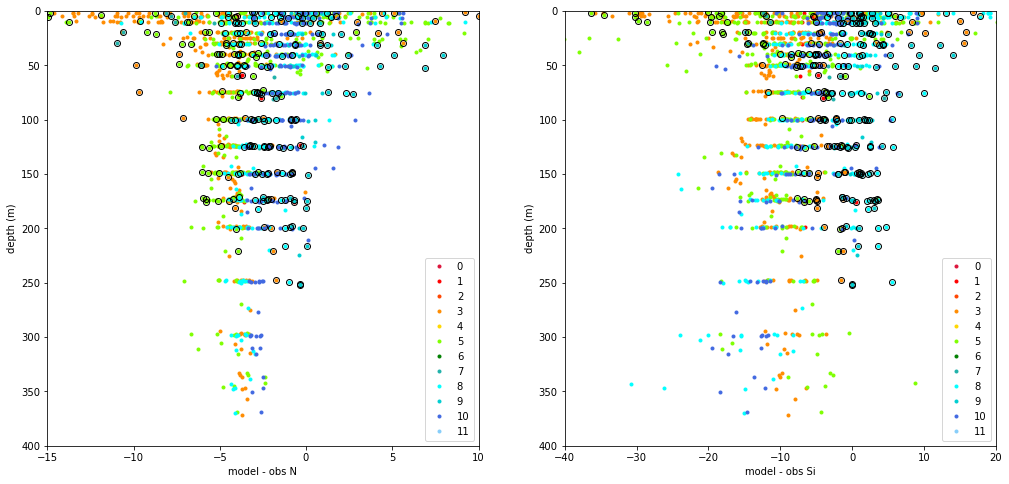

In [28]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_nitrate']].values-data.loc[iii,['N']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_silicon']].values-data.loc[iii,['Si']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model - obs N')
ax[0].set_xlim(-15,10)
ax[1].set_xlabel('model - obs Si')
ax[1].set_xlim(-40,20)
ax[0].plot(dJDF['mod_nitrate']-dJDF['N'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_silicon']-dJDF['Si'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

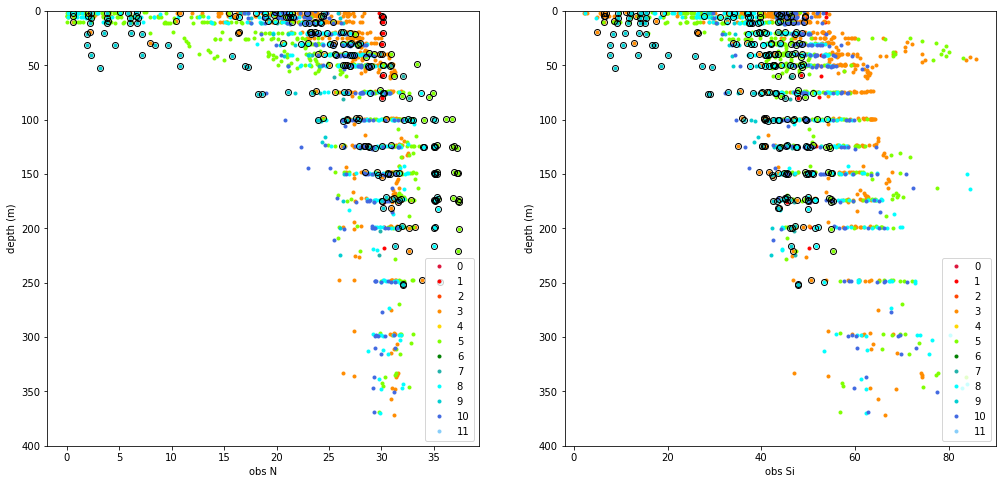

In [29]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['N']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['Si']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('obs N')
#ax[0].set_xlim(-15,10)
ax[1].set_xlabel('obs Si')
#ax[1].set_xlim(-40,20)
ax[0].plot(dJDF['N'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['Si'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

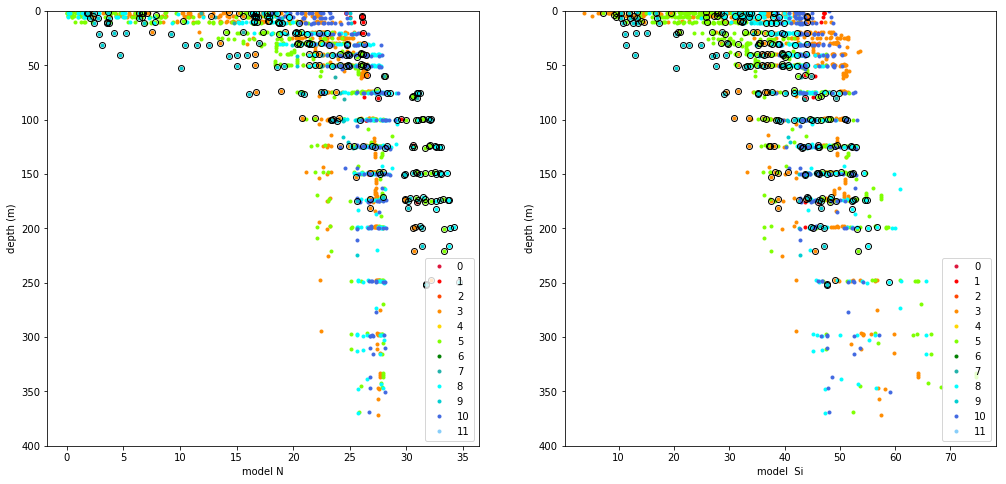

In [30]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_nitrate']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_silicon']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model N')
ax[1].set_xlabel('model  Si')
ax[0].plot(dJDF['mod_nitrate'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_silicon'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

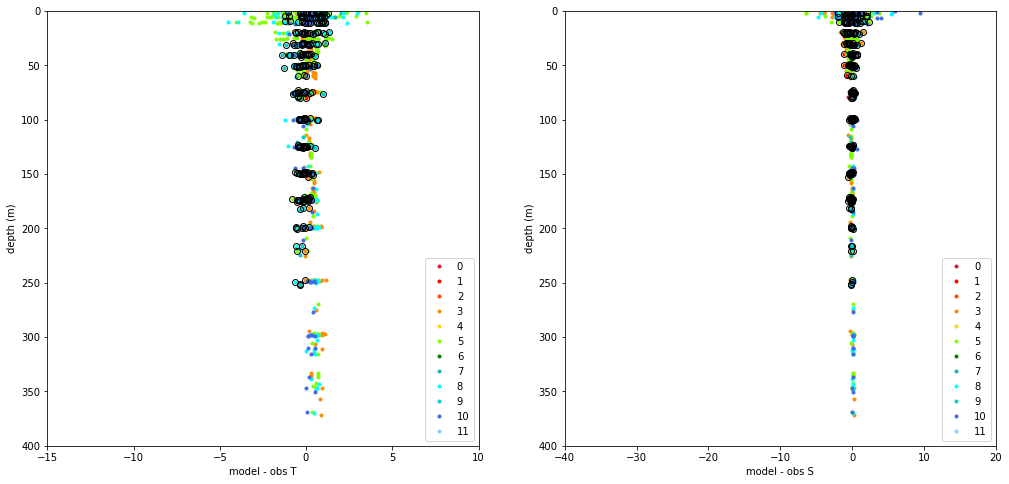

In [31]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_votemper']].values-data.loc[iii,['ConsT']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_vosaline']].values-data.loc[iii,['AbsSal']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model - obs T')
ax[0].set_xlim(-15,10)
ax[1].set_xlabel('model - obs S')
ax[1].set_xlim(-40,20)
ax[0].plot(dJDF['mod_votemper']-dJDF['ConsT'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_vosaline']-dJDF['AbsSal'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

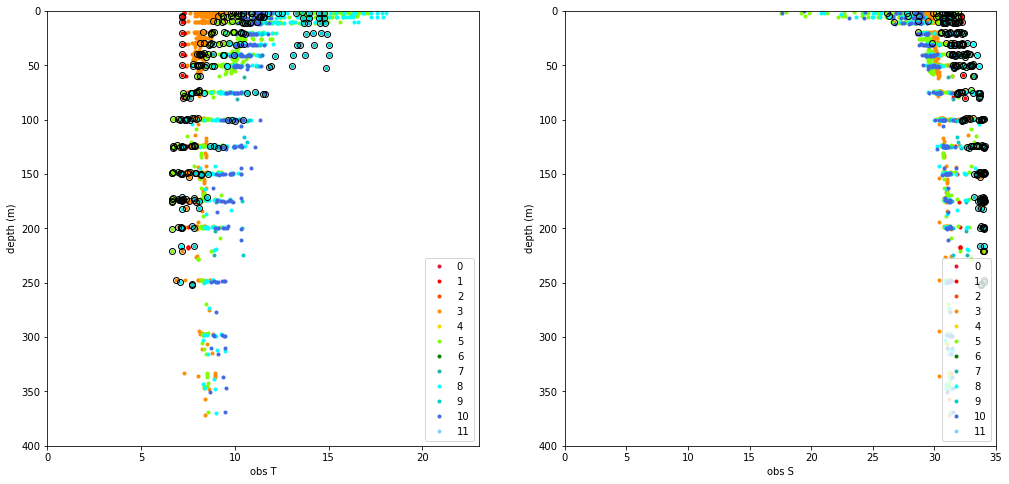

In [32]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['ConsT']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['AbsSal']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('obs T')
ax[0].set_xlim(0,23)
ax[1].set_xlabel('obs S')
ax[1].set_xlim(0,35)
ax[0].plot(dJDF['ConsT'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['AbsSal'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')

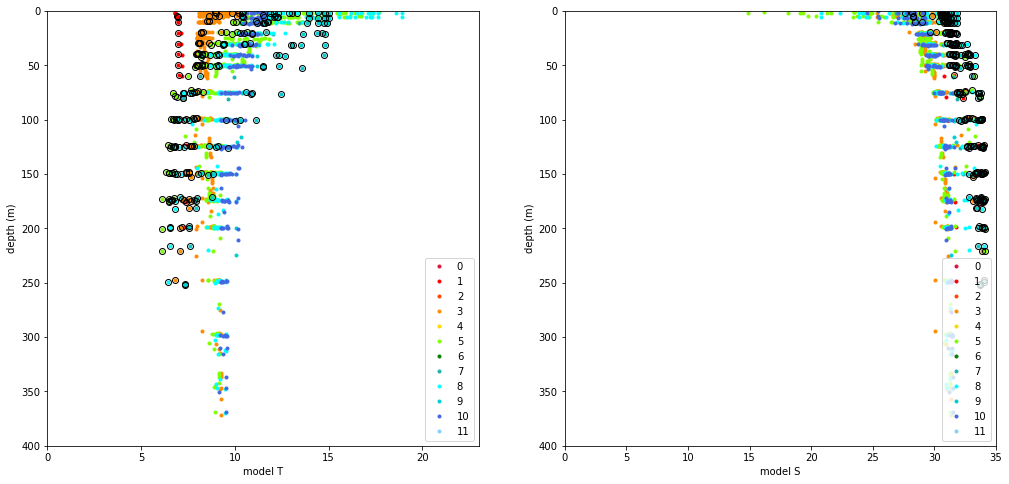

In [33]:
fig, ax = plt.subplots(1,2,figsize = (17,8))
cols=('crimson','red','orangered','darkorange','gold','chartreuse','green','lightseagreen','cyan','darkturquoise','royalblue',
      'lightskyblue','blue','darkblue','mediumslateblue','blueviolet','darkmagenta','fuchsia','deeppink','pink')
ii0=start_date
for ii in range(0,int((end_date-start_date).days/30)):
    iii=(data.dtUTC>=(start_date+dt.timedelta(days=ii*30)))&(data.dtUTC<(start_date+dt.timedelta(days=(ii+1)*30)))
    ax[0].plot(data.loc[iii,['mod_votemper']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
    ax[1].plot(data.loc[iii,['mod_vosaline']].values, data.loc[iii,['Z']].values, 
        '.', color = cols[ii],label=str(ii))
for axi in (ax[0],ax[1]):
    axi.legend(loc=4)
    axi.set_ylim(400,0)
    axi.set_ylabel('depth (m)')
ax[0].set_xlabel('model T')
ax[0].set_xlim(0,23)
ax[1].set_xlabel('model S')
ax[1].set_xlim(0,35)
ax[0].plot(dJDF['mod_votemper'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')
ax[1].plot(dJDF['mod_vosaline'],dJDF['Z'],'ko',markeredgecolor='k',markerfacecolor='None')